In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MRP (Markov Reward Process) representation
# Example taken from Fig. 1.7 of Lapan (2018). "Deep RL: Hands-On," 2nd Ed.

class MRP_Environment:
    def __init__(self, num_steps=10):
        self.states = ['Chat', 'Computer', 'Coffee', 'Home']
        self.rewards = np.array([[-1, 2, 1, 0],         # from Chat
                                 [-3, 5, 1, 2],         # from Computer
                                 [ 2, 3, 1, 0],         # from Coffee
                                 [ 0, 0, 1, 1]])        # from Home 
        self.trans = np.array([[0.5, 0.3, 0.2,   0],    # from Chat
                               [0.1, 0.5, 0.2, 0.2],    # from Computer
                               [0.7, 0.2, 0.1,   0],    # from Coffee
                               [  0,   0, 0.4, 0.6]])   # from Home
        self.num_steps = num_steps

    def reset(self):
        # Reset to Home state
        self.state = 3
        self.steps_left = self.num_steps
        return self.state
    
    def step(self):
        cum_prob = np.cumsum(self.trans[self.state, :])
        new_state = np.argwhere(np.random.rand(1) <= cum_prob)[0][0]
        old_state = self.state
        self.state = new_state
        self.steps_left -= 1
        return new_state, self.rewards[old_state, new_state]
    
    def is_done(self):
        return self.steps_left <= 0

## Generate a single episode

In [2]:
env = MRP_Environment()
total_reward = 0
obs = env.reset()

# Generate an episode
print(f'START: {env.states[obs]}')
while True:
    obs, rew = env.step()
    total_reward += rew
    print(f"       {env.states[obs]}\tTotal Reward: {total_reward}")
    if env.is_done():
        print("END")
        break

START: Home
       Home	Total Reward: 1
       Home	Total Reward: 2
       Coffee	Total Reward: 3
       Chat	Total Reward: 5
       Chat	Total Reward: 4
       Coffee	Total Reward: 5
       Coffee	Total Reward: 6
       Chat	Total Reward: 8
       Chat	Total Reward: 7
       Computer	Total Reward: 9
END


## Get histogram of many episodes

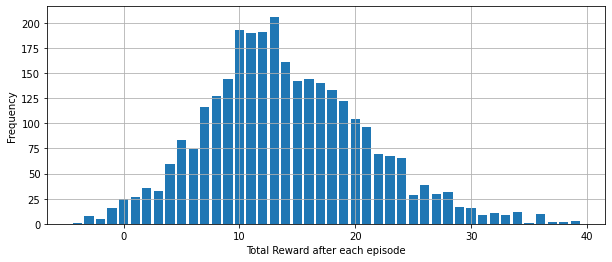

Mean:   14.102666666666666
Mode:   13
Median: 13.0


In [3]:
tots = []
env = MRP_Environment(10)
for _ in range(3000):
    total_reward = 0
    seq = []
    env.reset()
    while True:
        obs, rew = env.step()
        seq.append(obs)
        total_reward += rew
        if env.is_done():
            tots.append(total_reward)
            break

plt.figure(figsize=(10, 4))
plt.hist(tots, bins=np.arange(min(tots), max(tots)), 
         rwidth=0.8, align='left')
plt.ylabel('Frequency')
plt.xlabel('Total Reward after each episode')
plt.grid()
plt.show()

print(f'Mean:   {np.mean(tots)}')
print(f'Mode:   {max(set(tots), key=tots.count)}')
print(f'Median: {np.median(tots)}')
#print(tots)